In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras
# import keras

print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

sys.version_info(major=3, minor=7, micro=3, releaselevel='final', serial=0)
matplotlib 3.0.3
numpy 1.16.2
pandas 0.24.2
sklearn 0.21.1
tensorflow 2.0.0-alpha0
tensorflow.python.keras.api._v2.keras 2.2.4-tf


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [3]:
def show_single_image(img_arr):
    plt.imshow(img_arr, cmap="binary")
    plt.show()

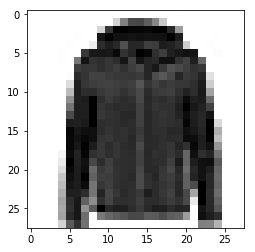

In [4]:
show_single_image(x_train[0])

In [5]:
def show_imgs(n_rows, n_cols, x_data, y_data, class_names):
    assert len(x_data) == len(y_data)
    assert n_rows * n_cols < len(x_data)
    plt.figure(figsize=(n_cols * 1.4, n_rows * 1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            plt.subplot(n_rows, n_cols, index+1)
            plt.imshow(x_data[index], cmap="binary", interpolation="nearest")
            plt.axis('off')
            plt.title(class_names[y_data[index]])
    plt.show()

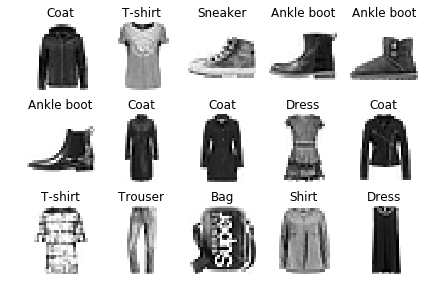

In [6]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
show_imgs(3, 5, x_train, y_train, class_names)

In [7]:
# tf.keras.models.Sequential()

"""
model = tf.keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
"""


model = tf.keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# relu: y = max(0, x)
# softmax: 将向量变成概率分布. x = [x1, x2, x3],
#          y = [e^x1/sum, e^x2/sum, e^x3/sum], sum = e^x1 + e^x2 + e^x3

# reason for sparse: y->index. y->one_hot->[]
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [8]:
model.layers

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
# [None, 784] * W + b -> [None, 300] W.shape=[784, 300], b.shape=[300]

In [11]:
history = model.fit(x_train, y_train, epochs=10, validation_data=[x_valid, y_valid])

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 3s 49us/sample - loss: 2.0942 - accuracy: 0.7106 - val_loss: 0.7047 - val_accuracy: 0.7548
Epoch 2/10
55000/55000 [==============================] - 3s 46us/sample - loss: 0.5758 - accuracy: 0.7910 - val_loss: 0.5834 - val_accuracy: 0.8018
Epoch 3/10
55000/55000 [==============================] - 3s 46us/sample - loss: 0.5084 - accuracy: 0.8158 - val_loss: 0.5205 - val_accuracy: 0.8154
Epoch 4/10
55000/55000 [==============================] - 3s 46us/sample - loss: 0.4639 - accuracy: 0.8319 - val_loss: 0.4766 - val_accuracy: 0.8362
Epoch 5/10
55000/55000 [==============================] - 3s 46us/sample - loss: 0.4319 - accuracy: 0.8418 - val_loss: 0.4640 - val_accuracy: 0.8398
Epoch 6/10
55000/55000 [==============================] - 2s 44us/sample - loss: 0.4093 - accuracy: 0.8488 - val_loss: 0.4429 - val_accuracy: 0.8458
Epoch 7/10
55000/55000 [==============================] -

In [12]:
type(history)

tensorflow.python.keras.callbacks.History

In [13]:
history.history

{'loss': [2.0941708551883695,
  0.5757694834362377,
  0.5083615497849204,
  0.46391830591721966,
  0.4319165788347071,
  0.4092570237203078,
  0.3924370343338359,
  0.3790487415487116,
  0.3672266356078061,
  0.355857286418568],
 'accuracy': [0.7106182,
  0.7909818,
  0.81583637,
  0.8319273,
  0.84181815,
  0.8487818,
  0.8538,
  0.8591273,
  0.86283636,
  0.86774546],
 'val_loss': [0.7046638221740723,
  0.5833657200813294,
  0.5205142631530761,
  0.47662221879959105,
  0.46399990117549894,
  0.4428920171499252,
  0.435584357213974,
  0.4333046553134918,
  0.42807905859947204,
  0.42715653355121613],
 'val_accuracy': [0.7548,
  0.8018,
  0.8154,
  0.8362,
  0.8398,
  0.8458,
  0.8532,
  0.853,
  0.8594,
  0.8566]}

In [14]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

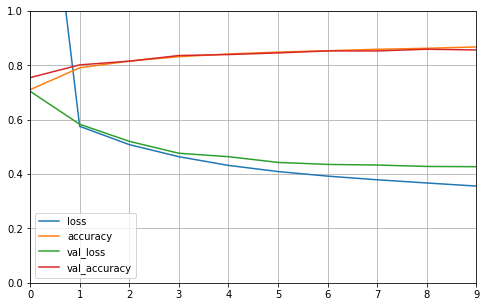

In [15]:
plot_learning_curves(history)